In [1]:
import gempy as gp
import numpy as np
%matplotlib inline

## Geological Model with just a Fault

In [2]:
# Create a model instance
geo_model = gp.create_model('no_dyke')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(geo_model, [0., 1200., 0., 1000., 0., 1500.], [50, 50, 50],
            path_i = '../data/07_Dyke_Model_3D_wo_Dyke_interfaces.csv',
            path_o = '../data/07_Dyke_Model_3D_wo_Dyke_orientations.csv');

Active grids: ['regular']


C:\Users\brigg\miniconda3\envs\env_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


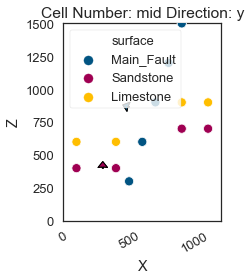

In [3]:
gp.plot_2d(geo_model, show_legend=False)

In [4]:
# Set the interpolator function
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[]);

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            2165.64
$C_o$             111667
drift equations   [3, 3]


In [5]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Main_Fault,Default series,1,#015482,1
1,Sandstone,Default series,2,#9f0052,2
2,Limestone,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [6]:
# Assign formations to series
gp.map_series_to_surfaces(geo_model,
                         {"Fault_series":'Main_Fault',
                         "Sediment_series":('Limestone', 'Sandstone')},
                         remove_unused_series=True)
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Main_Fault,Fault_series,1,#015482,1
1,Sandstone,Sediment_series,1,#9f0052,2
2,Limestone,Sediment_series,2,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [7]:
# Set Faults
geo_model.set_is_fault(['Fault_series'],
                      change_color=False);

In [8]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=True)

C:\Users\brigg\miniconda3\envs\env_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


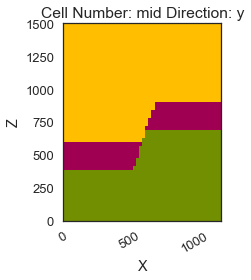

In [9]:
gp.plot_2d(geo_model, direction='y', show_block=True, show_boundaries=False, 
           show_data=False, show_results=True)

## Introducing a Dyke to try to act as a Fault body

In [10]:
# Create a model instance
model_dyke = gp.create_model('with_dyke')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(model_dyke, [0., 1200., 0., 1000., 0., 1500.], [50, 50, 50],
            path_i = '../data/07_Dyke_Model_Dyke_interfaces.csv',
            path_o = '../data/07_Dyke_Model_Dyke_orientations.csv');

Active grids: ['regular']


C:\Users\brigg\miniconda3\envs\env_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


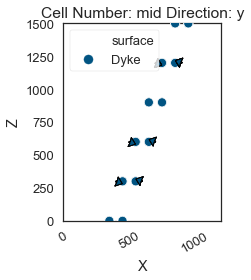

In [11]:
gp.plot_2d(model_dyke)

In [17]:
# Assign formations to series
gp.map_series_to_surfaces(model_dyke,
                         {"Dyke_series": 'Dyke'},
                         remove_unused_series=True)
model_dyke.surfaces

,surface,series,order_surfaces,color,id
0,Dyke,Dyke_series,1,#015482,1
1,basement,Basement,1,#9f0052,2


In [18]:
# Set the interpolator function
# Create the theano model
gp.set_interpolator(model_dyke,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[]);

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            2165.64
$C_o$             111667
drift equations   [3, 3]


In [19]:
# Compute the model
sol_dyke = gp.compute_model(model_dyke, compute_mesh=True)

C:\Users\brigg\miniconda3\envs\env_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


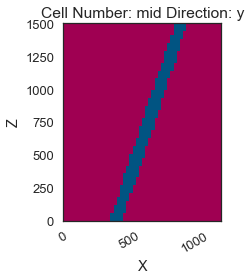

In [20]:
gp.plot_2d(model_dyke, direction='y', show_block=True, show_boundaries=False, 
           show_data=False, show_results=True)

## Combine both models
Using a hierarchical modeling approach, we can combine both models and generate a final 3D model with a fault core or dyke.

In [33]:
sol_dyke


Lithology ids 
  [2. 2. 2. ... 2. 2. 2.] 

In [36]:
inds = np.where(sol_dyke.lith_block==1)

In [41]:
cp_sol_lith_block = np.copy(sol.lith_block)

In [42]:
cp_sol_lith_block[inds] = 5.

In [44]:
sol.lith_block[inds] = 5.

C:\Users\brigg\miniconda3\envs\env_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


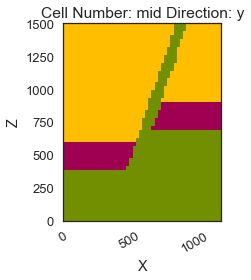

In [50]:
gp.plot_2d(geo_model, direction='y', show_block=True, show_boundaries=False, 
           show_data=False, show_results=True)

In [54]:
gp.plot_3d(geo_model, show_surfaces=False, show_boundaries=True)

In [22]:
geo_model.loc[model_dyke.lith_id==2, 'lith_id']=5

AttributeError: 'Project' object has no attribute 'loc'